In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit.quantum_info.operators import Operator
from qiskit.circuit.library.standard_gates import *
import numpy as np
from itertools import product
import numpy as np
from numpy import pi
from qiskit.transpiler.passes import ApplyLayout
from qiskit import QuantumCircuit
from qiskit.transpiler import PassManager
import sys
sys.path.append("..")
import fakeutils
from fakeutils.fakeutils import BasisTranslator
from fakeutils.equivalence_library import SessionEquivalenceLibrary, rootSwap
from fakeutils.riswap import RiSwapGate

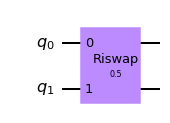

In [4]:
qc = QuantumCircuit(2)
qc.append(RiSwapGate(alpha=.5), [0,1])
qc.draw(output='mpl')

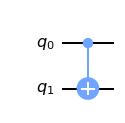

In [17]:
qc = QuantumCircuit(2)
qc.append(CXGate(), [0,1])
qc.draw(output='mpl')

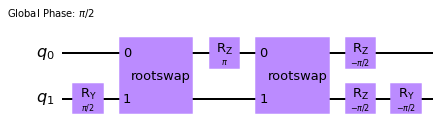

In [18]:
basis_pass = BasisTranslator(SessionEquivalenceLibrary, ['rootswap', 'ry', 'rz','h'])
pm = PassManager([basis_pass])
circ_trans = pm.run(qc)
circ_trans.draw(output='mpl')

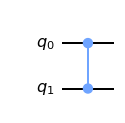

In [14]:
qc = QuantumCircuit(2)
qc.append(CZGate(), [0,1])
qc.draw(output='mpl')

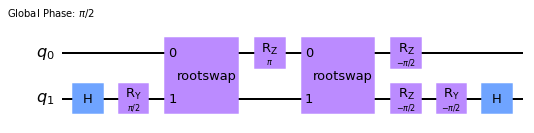

In [15]:
basis_pass = BasisTranslator(SessionEquivalenceLibrary, ['rootswap', 'ry', 'rz','h'])
pm = PassManager([basis_pass])
circ_trans = pm.run(qc)
circ_trans.draw(output='mpl')

In [ ]:
transpile(circ_trans, optimization_level=3)

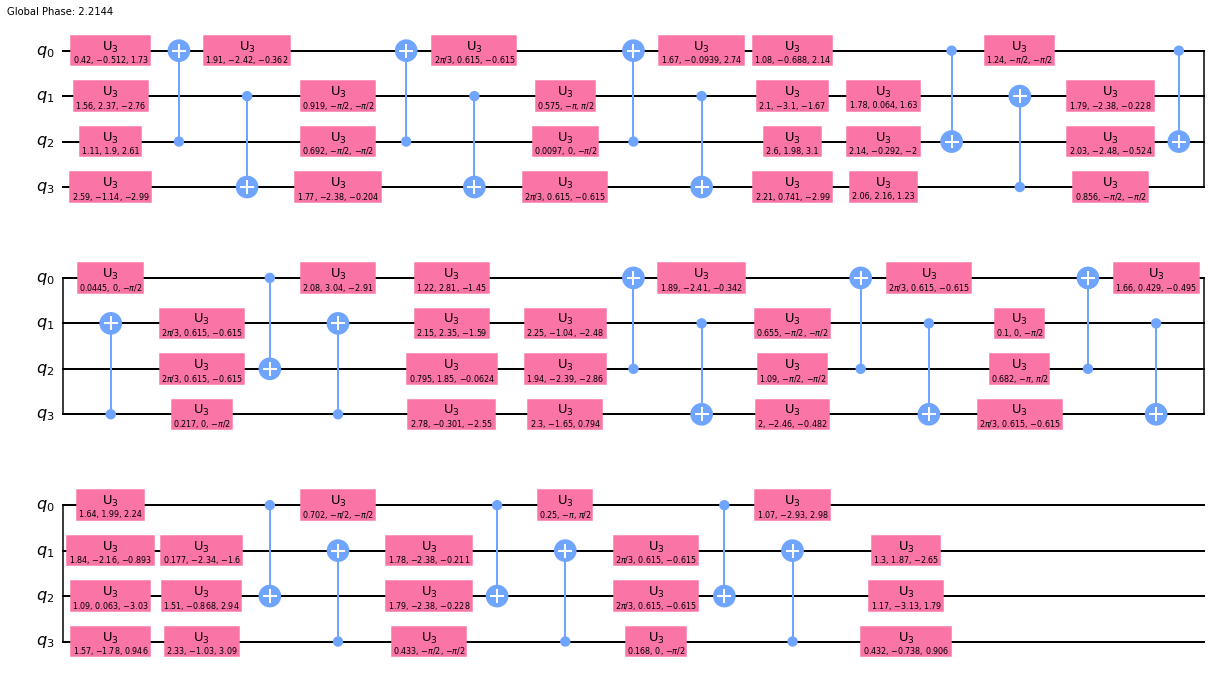

In [25]:
#Import the qv function
from qiskit.circuit.library import QuantumVolume
qc = QuantumVolume(4,4, 42).decompose().decompose()
qc.draw(output='mpl')

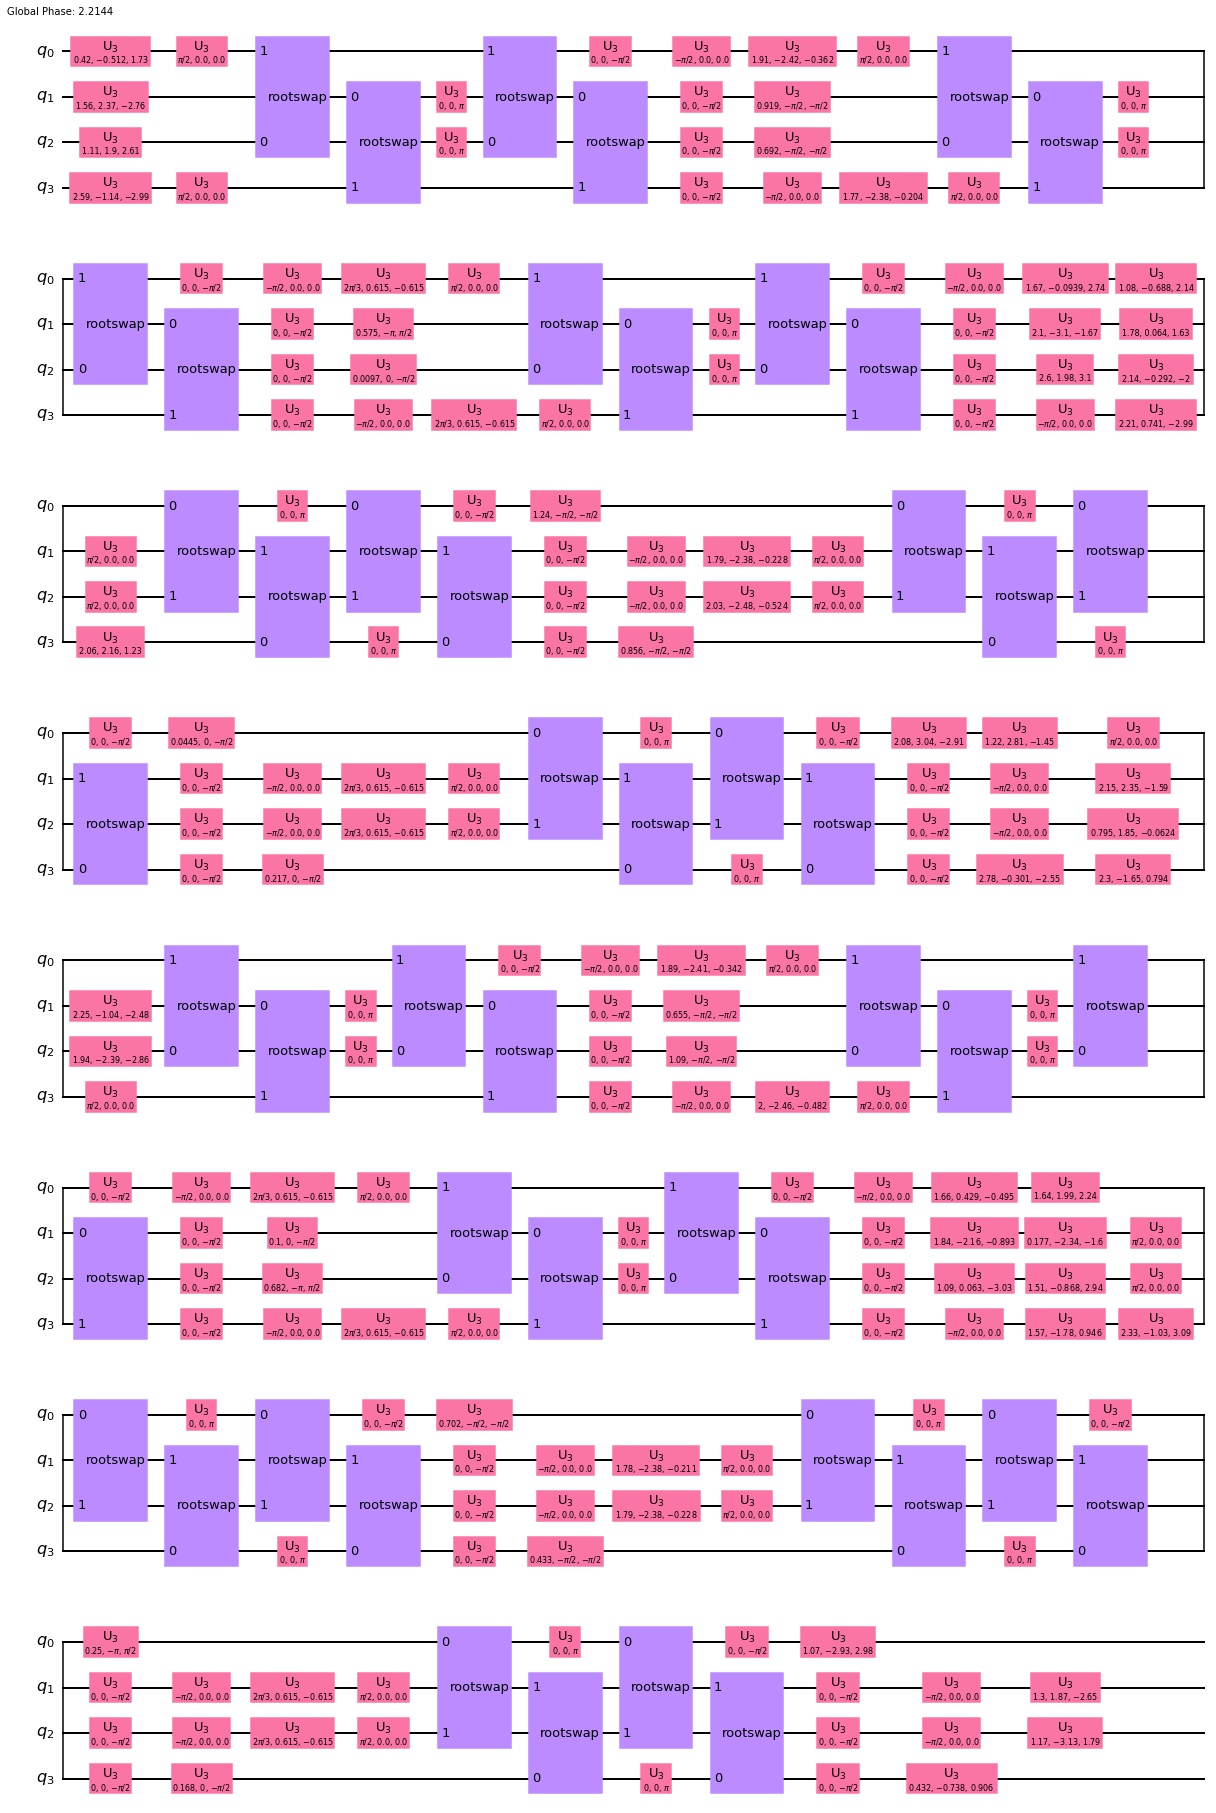

In [26]:
basis_pass = BasisTranslator(SessionEquivalenceLibrary, ['rootswap', 'u3'])
pm = PassManager([basis_pass])
circ_trans = pm.run(qc)
circ_trans.draw(output='mpl')

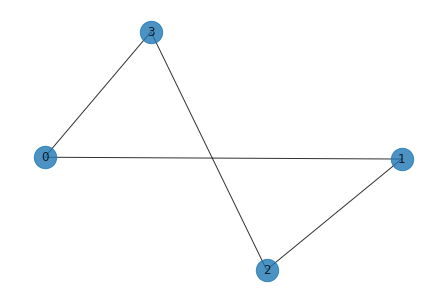

In [44]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from([0, 1, 2, 3])
G.add_edges_from([(0, 1), (1, 2), (2, 3), (3, 0)])
nx.draw(G, with_labels=True, alpha=0.8, node_size=500)

In [57]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
adjacency = nx.adjacency_matrix(G).todense()

nqubits = 4

beta = Parameter("$\\beta$")
qc_mix = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_mix.rx(2 * beta, i)
    
qc_mix.draw()

┌───────────────┐
q_0: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_1: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_2: ┤ Rx(2*$\beta$) ├
     ├───────────────┤
q_3: ┤ Rx(2*$\beta$) ├
     └───────────────┘

In [58]:
gamma = Parameter("$\\gamma$")
qc_p = QuantumCircuit(nqubits)
for pair in list(G.edges()):  # pairs of nodes
    qc_p.rzz(2 * gamma, pair[0], pair[1])
    qc_p.barrier()
    
qc_p.decompose().draw()

░                              ░      »
q_0: ──■──────────────────────■───░───■──────────────────────■───░──────»
     ┌─┴─┐┌────────────────┐┌─┴─┐ ░   │                      │   ░      »
q_1: ┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░───┼──────────────────────┼───░───■──»
     └───┘└────────────────┘└───┘ ░   │                      │   ░ ┌─┴─┐»
q_2: ─────────────────────────────░───┼──────────────────────┼───░─┤ X ├»
                                  ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ └───┘»
q_3: ─────────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░──────»
                                  ░ └───┘└────────────────┘└───┘ ░      »
«                             ░                              ░ 
«q_0: ────────────────────────░──────────────────────────────░─
«                             ░                              ░ 
«q_1: ────────────────────■───░──────────────────────────────░─
«     ┌────────────────┐┌─┴─┐ ░                              ░ 
«q_2: ┤ Rz(2*$\gamma$) ├┤ X ├─░───■──────────────────────■───░─
«     └────────────────┘└───┘ ░ ┌─┴─┐┌────────────────┐┌─┴─┐ ░ 
«q_3: ────────────────────────░─┤ X ├┤ Rz(2*$\gamma$) ├┤ X ├─░─
«                             ░ └───┘└────────────────┘└───┘ ░

In [59]:
qc_0 = QuantumCircuit(nqubits)
for i in range(0, nqubits):
    qc_0.h(i)
    
qc_0.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     ├───┤
q_3: ┤ H ├
     └───┘

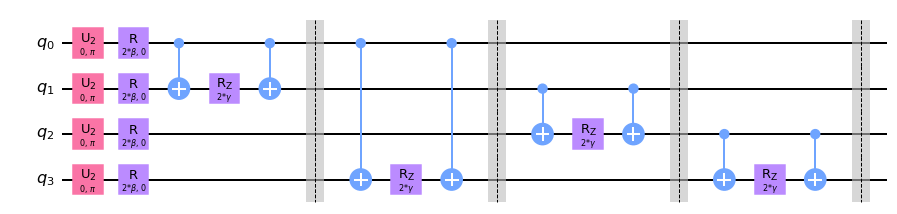

In [65]:
qc_qaoa = QuantumCircuit(nqubits)

qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])
qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])
qc = qc_qaoa.decompose().decompose()
qc_qaoa.decompose().decompose().draw(output='mpl')


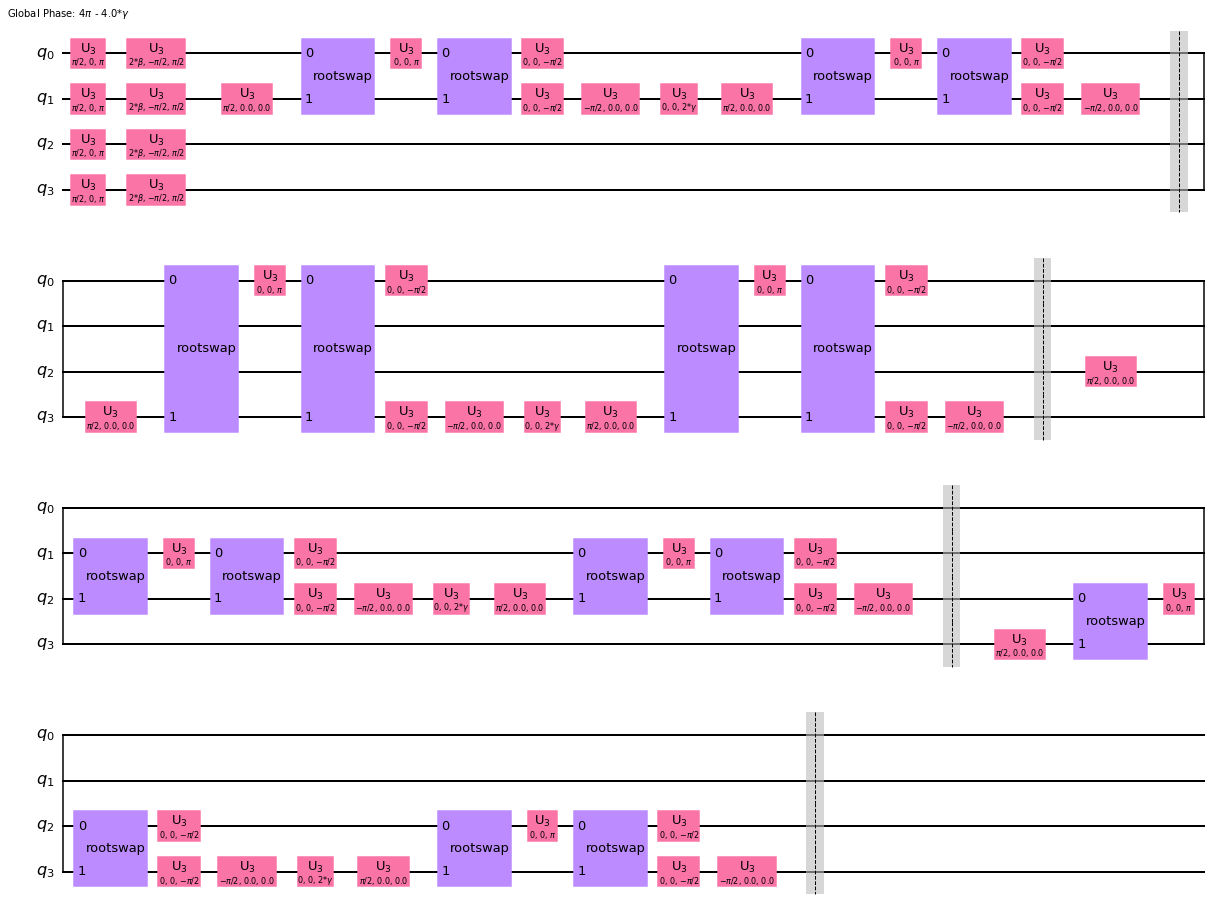

In [64]:
basis_pass = BasisTranslator(SessionEquivalenceLibrary, ['rootswap', 'u3'])
pm = PassManager([basis_pass])
circ_trans = pm.run(qc)
circ_trans.draw(output='mpl')

In [ ]:
basis_pass = BasisTranslator(SessionEquivalenceLibrary, ['cz', 'u3'])
pm = PassManager([basis_pass])
circ_trans = pm.run(qc)
circ_trans.draw(output='mpl')

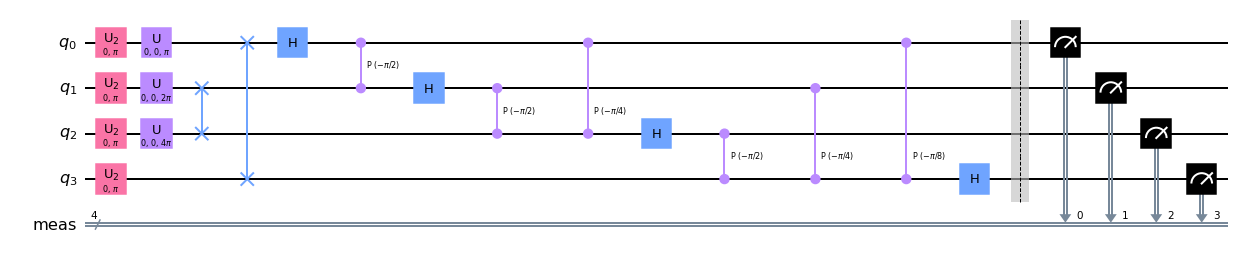

In [67]:
def qft_rotations(circuit, n):
    """Performs qft on the first n qubits in circuit (without swaps)"""
    if n == 0:
        return circuit
    n -= 1
    circuit.h(n)
    for qubit in range(n):
        circuit.cp(pi/2**(n-qubit), qubit, n)
    # At the end of our function, we call the same function again on
    # the next qubits (we reduced n by one earlier in the function)
    qft_rotations(circuit, n)
    
def swap_registers(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    return circuit

def qft(circuit, n):
    """QFT on the first n qubits in circuit"""
    qft_rotations(circuit, n)
    swap_registers(circuit, n)
    return circuit
def inverse_qft(circuit, n):
    """Does the inverse QFT on the first n qubits in circuit"""
    # First we create a QFT circuit of the correct size:
    qft_circ = qft(QuantumCircuit(n), n)
    # Then we take the inverse of this circuit
    invqft_circ = qft_circ.inverse()
    # And add it to the first n qubits in our existing circuit
    circuit.append(invqft_circ, circuit.qubits[:n])
    return circuit.decompose() # .decompose() allows us to see the individual gates

def getQFTCircuit(nqubits=4, number=5):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    qc.p(number*pi/4,0)
    qc.p(number*pi/2,1)
    qc.p(number*pi,2)

    qc = inverse_qft(qc, nqubits)
    qc.measure_all()
    return qc

example = getQFTCircuit(4,4)
example.draw(output='mpl')

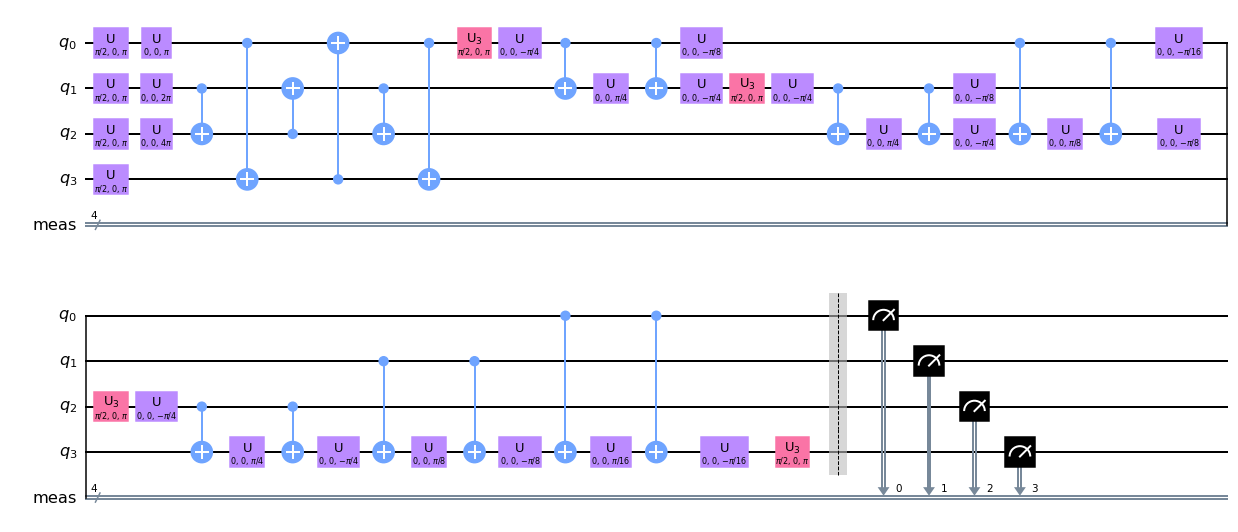

In [70]:
example.decompose().decompose().draw(output='mpl')

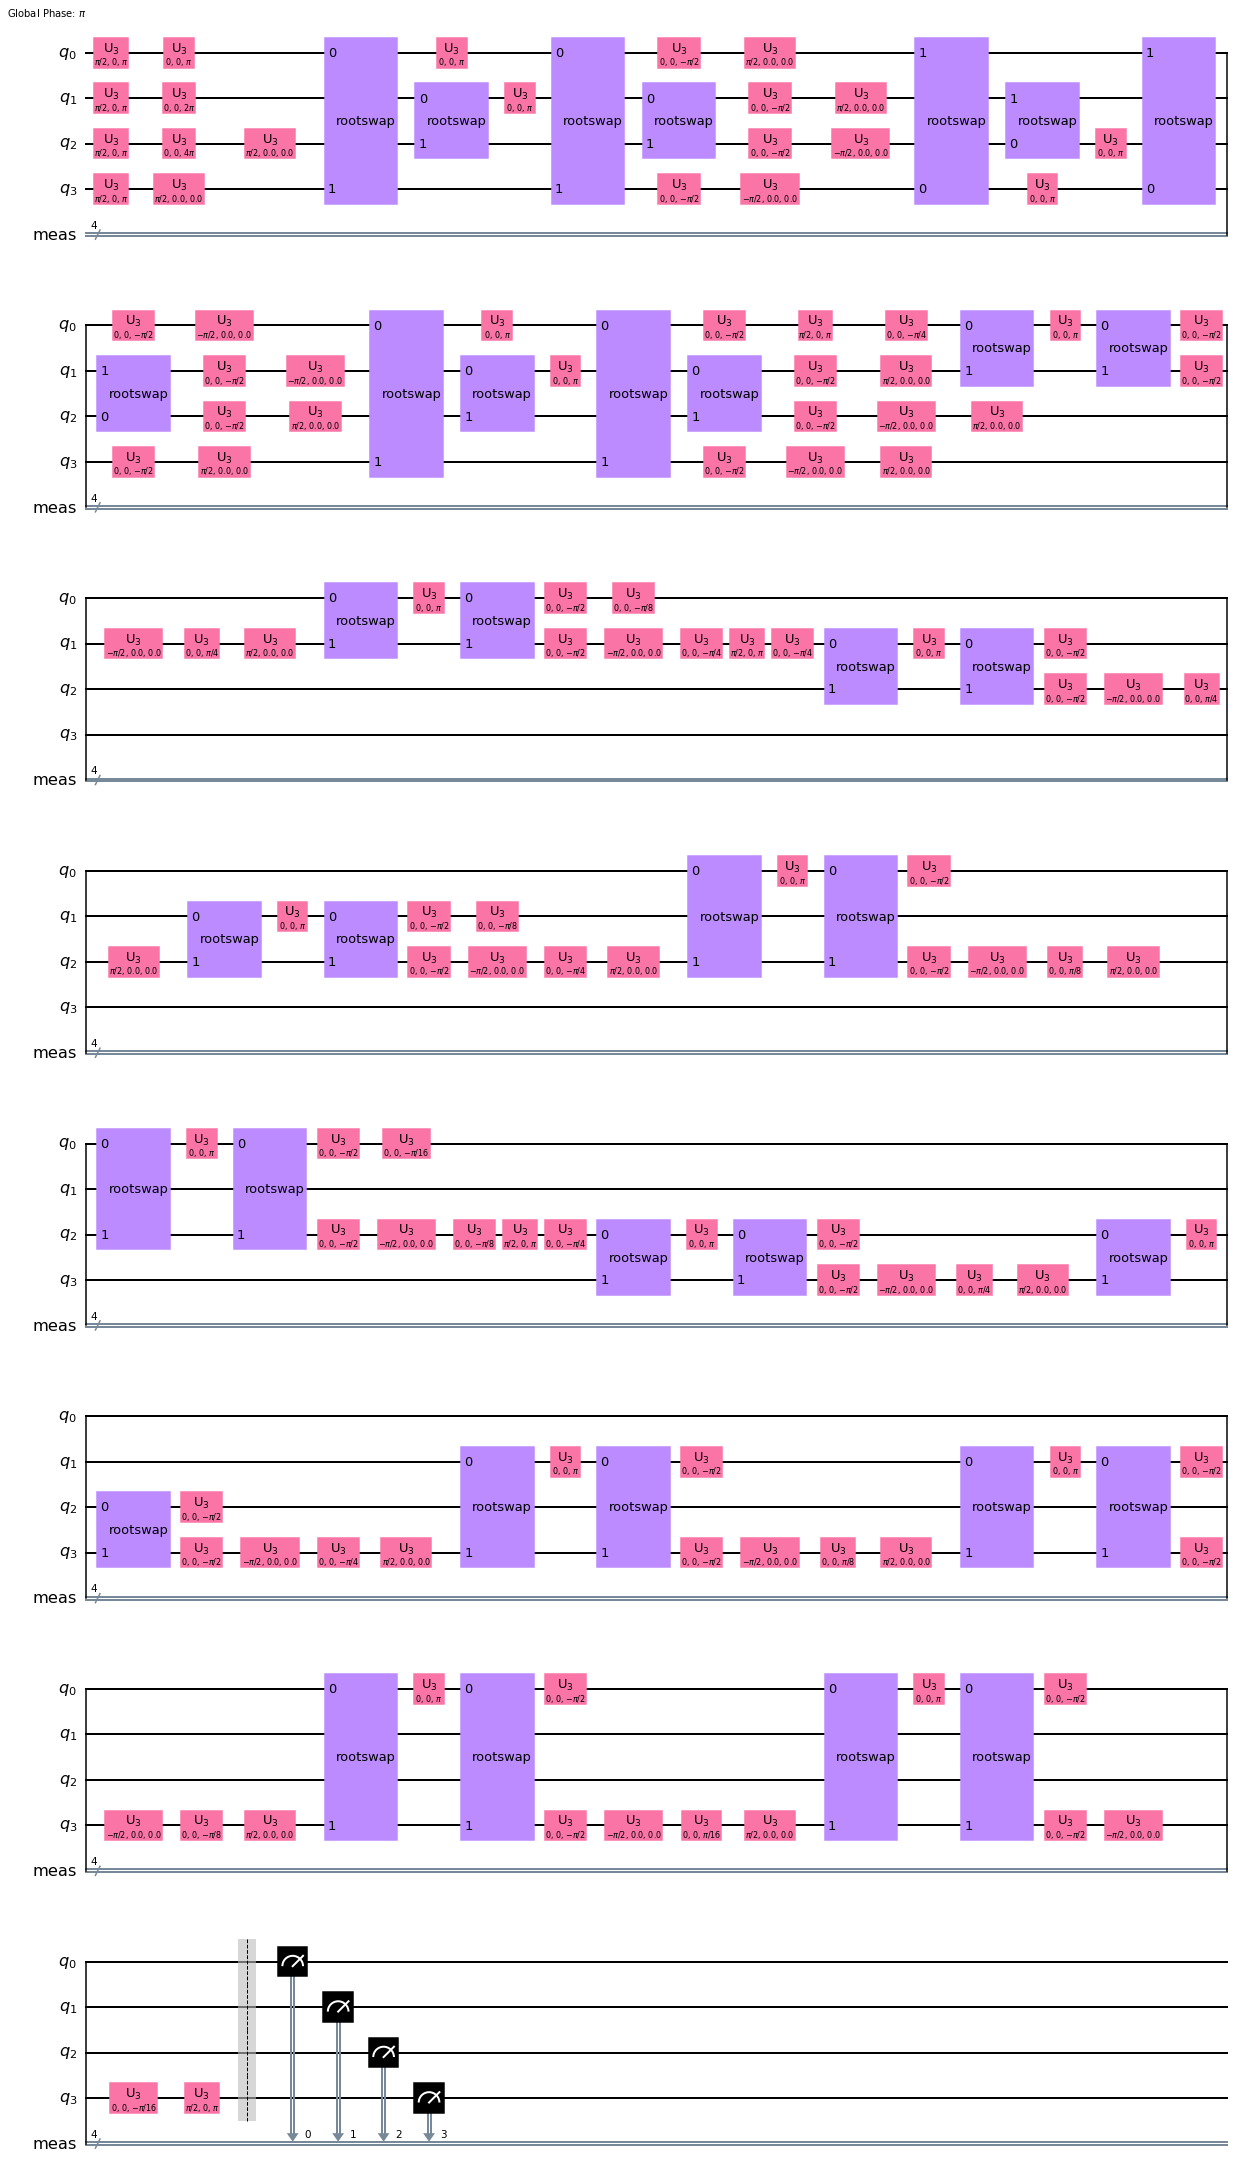

In [69]:
qc = example.decompose().decompose()
basis_pass = BasisTranslator(SessionEquivalenceLibrary, ['rootswap', 'u3'])
pm = PassManager([basis_pass])
circ_trans = pm.run(qc)
circ_trans.draw(output='mpl')